# I imported all the necessary packages for my real estate dataset analysis and model building. Each package serves a specific role in my workflow.



In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from glob import glob
from ipywidgets import Dropdown, FloatSlider, IntSlider, interact
import matplotlib.ticker as ticker
import plotly.express as px
from sklearn.preprocessing import OneHotEncoder
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import PolynomialFeatures
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score
from sklearn.linear_model import Lasso
from sklearn.model_selection import RandomizedSearchCV
from sklearn.neighbors import KNeighborsRegressor
from sklearn.ensemble import RandomForestRegressor
from xgboost import XGBRegressor



import warnings
warnings.filterwarnings('ignore')

# I configured pandas display options and matplotlib formatter limits for better readability of my data and plots.

In [ ]:
pd.options.display.float_format = '{:,.2f}'.format
plt.rcParams['axes.formatter.useoffset'] = False
plt.rcParams['axes.formatter.limits'] = (-20, 20)

#I defined a wrangle function to encapsulate data loading, promoting cleaner and more reusable code.


In [ ]:
def wrangle(file):
    df = pd.read_csv(file)



    return df

#I used glob to find all CSV files matching the specified pattern in the /content/ directory.

In [ ]:
files = glob("/content/mexico-city-real-estate-*.csv")
files

['/content/mexico-city-real-estate-2.csv',
 '/content/mexico-city-real-estate-4.csv',
 '/content/mexico-city-real-estate-1.csv',
 '/content/mexico-city-real-estate-5.csv',
 '/content/mexico-city-real-estate-3.csv']

#I applied my wrangle function to each file and then concatenated all DataFrames into a single DataFrame df. I then displayed its information and the first few rows to inspect the loaded data.

In [ ]:
frame = [wrangle(file) for file in files]
df = pd.concat(frame,ignore_index=True)
df.info()
df.head()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 23140 entries, 0 to 23139
Data columns (total 16 columns):
 #   Column                      Non-Null Count  Dtype  
---  ------                      --------------  -----  
 0   operation                   23140 non-null  object 
 1   property_type               23140 non-null  object 
 2   place_with_parent_names     23140 non-null  object 
 3   lat-lon                     20698 non-null  object 
 4   price                       22745 non-null  float64
 5   currency                    22745 non-null  object 
 6   price_aprox_local_currency  22745 non-null  float64
 7   price_aprox_usd             22745 non-null  float64
 8   surface_total_in_m2         8633 non-null   float64
 9   surface_covered_in_m2       22215 non-null  float64
 10  price_usd_per_m2            6012 non-null   float64
 11  price_per_m2                21320 non-null  float64
 12  floor                       1531 non-null   float64
 13  rooms                       621

,operation,property_type,place_with_parent_names,lat-lon,price,currency,price_aprox_local_currency,price_aprox_usd,surface_total_in_m2,surface_covered_in_m2,price_usd_per_m2,price_per_m2,floor,rooms,expenses,properati_url
0,sell,apartment,|Gustavo A. Madero|Distrito Federal|México|,"19.516777,-99.160149","1,200,000.00",MXN,"1,189,144.46","63,223.78",88.00,88.00,718.45,"13,636.36",NaN,NaN,NaN,http://gustavo-a-madero.properati.com.mx/r644_...
1,sell,apartment,|Gustavo A. Madero|Distrito Federal|México|,"19.466724,-99.131614","480,000.00",MXN,"475,657.74","25,289.51",NaN,48.00,NaN,"10,000.00",NaN,NaN,NaN,http://vallejo.properati.com.mx/mz4c_venta_dep...
2,sell,apartment,|Álvaro Obregón|Distrito Federal|México|,"19.33228,-99.243934","4,559,261.00",MXN,"4,518,016.68","240,211.43",NaN,126.00,NaN,"36,184.61",NaN,NaN,NaN,http://alvaro-obregon.properati.com.mx/jh8j_ve...
3,sell,apartment,|Benito Juárez|Quintana Roo|México|,"21.1105772788,-86.8537859927","3,808,088.00",MXN,"3,774,533.79","200,682.34",0.00,171.00,NaN,"22,269.52",NaN,NaN,NaN,http://cancun.properati.com.mx/qus8_venta_depa...
4,sell,apartment,|Benito Juárez|Distrito Federal|México|,"19.39365,-99.14769","1,730,000.00",MXN,"1,714,349.82","91,147.61",NaN,100.00,NaN,"17,300.00",NaN,NaN,NaN,http://benito-juarez.properati.com.mx/q5my_ven...


#I calculated and displayed the count of missing values for each column in descending order, to quickly identify columns with significant missing data.

In [ ]:
df.isnull().sum().sort_values(ascending=False)

,0
expenses,23126
rooms,22519
floor,21609
price_usd_per_m2,17128
surface_total_in_m2,14507
lat-lon,2442
price_per_m2,1820
surface_covered_in_m2,925
price,395
currency,395


#I identified columns with more than 50% missing values and dropped them. Then, I displayed the updated DataFrame's information and head to verify the changes.

In [ ]:
null_percent = df.isnull().mean()
drop_cols = null_percent[null_percent > 0.5].index
df.drop(columns=drop_cols, inplace=True)
df.info()
df.head()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 23140 entries, 0 to 23139
Data columns (total 11 columns):
 #   Column                      Non-Null Count  Dtype  
---  ------                      --------------  -----  
 0   operation                   23140 non-null  object 
 1   property_type               23140 non-null  object 
 2   place_with_parent_names     23140 non-null  object 
 3   lat-lon                     20698 non-null  object 
 4   price                       22745 non-null  float64
 5   currency                    22745 non-null  object 
 6   price_aprox_local_currency  22745 non-null  float64
 7   price_aprox_usd             22745 non-null  float64
 8   surface_covered_in_m2       22215 non-null  float64
 9   price_per_m2                21320 non-null  float64
 10  properati_url               23140 non-null  object 
dtypes: float64(5), object(6)
memory usage: 1.9+ MB


,operation,property_type,place_with_parent_names,lat-lon,price,currency,price_aprox_local_currency,price_aprox_usd,surface_covered_in_m2,price_per_m2,properati_url
0,sell,apartment,|Gustavo A. Madero|Distrito Federal|México|,"19.516777,-99.160149","1,200,000.00",MXN,"1,189,144.46","63,223.78",88.00,"13,636.36",http://gustavo-a-madero.properati.com.mx/r644_...
1,sell,apartment,|Gustavo A. Madero|Distrito Federal|México|,"19.466724,-99.131614","480,000.00",MXN,"475,657.74","25,289.51",48.00,"10,000.00",http://vallejo.properati.com.mx/mz4c_venta_dep...
2,sell,apartment,|Álvaro Obregón|Distrito Federal|México|,"19.33228,-99.243934","4,559,261.00",MXN,"4,518,016.68","240,211.43",126.00,"36,184.61",http://alvaro-obregon.properati.com.mx/jh8j_ve...
3,sell,apartment,|Benito Juárez|Quintana Roo|México|,"21.1105772788,-86.8537859927","3,808,088.00",MXN,"3,774,533.79","200,682.34",171.00,"22,269.52",http://cancun.properati.com.mx/qus8_venta_depa...
4,sell,apartment,|Benito Juárez|Distrito Federal|México|,"19.39365,-99.14769","1,730,000.00",MXN,"1,714,349.82","91,147.61",100.00,"17,300.00",http://benito-juarez.properati.com.mx/q5my_ven...


#I inspected the unique values in the property_type column to understand the different property categories present in my dataset.

In [ ]:
df.property_type.unique()

array(['apartment', 'house', 'store', 'PH'], dtype=object)

#I filtered the DataFrame to include only properties where property_type is 'house', as per my analysis focus.

In [ ]:
p_type = df["property_type"] == "house"
df = df[p_type]
df.head()

,operation,property_type,place_with_parent_names,lat-lon,price,currency,price_aprox_local_currency,price_aprox_usd,surface_covered_in_m2,price_per_m2,properati_url
8,sell,house,|Gustavo A. Madero|Distrito Federal|México|,"19.509133,-99.142907","3,750,000.00",MXN,"3,716,076.40","197,574.31",250.00,"15,000.00",http://torres-lindavista.properati.com.mx/pw1o...
9,sell,house,|Iztacalco|Distrito Federal|México|,"19.382139,-99.127632","2,578,909.00",MXN,"2,556,185.36","135,905.86",205.00,"12,580.04",http://militar-marte.properati.com.mx/rbx1_ven...
10,sell,house,|Coyoacán|Distrito Federal|México|,"19.3448820869,-99.1282439232","1,890,000.00",MXN,"1,873,346.53","99,601.06",193.00,"9,792.75",http://coyoacan.properati.com.mx/qtgj_venta_ca...
11,sell,house,|Tlalpan|Distrito Federal|México|,"19.2929574924,-99.1691724211","26,000,000.00",MXN,"25,770,906.95","1,370,173.43","1,500.00","17,333.33",http://tlalpan.properati.com.mx/pmpt_venta_cas...
12,sell,house,|Benito Juárez|Distrito Federal|México|,"19.383515,-99.127418","7,250,000.00",MXN,"7,186,118.26","382,067.59",340.00,"21,323.53",http://benito-juarez.properati.com.mx/r15j_ven...


#I split the lat-lon column into separate lat and lon columns, converting them to float type, and then dropped the original lat-lon column.

In [ ]:
df[["lat", "lon"]] = df["lat-lon"].str.split(",", expand=True).astype(float)
df.drop(columns="lat-lon", inplace=True)
df.head()

,operation,property_type,place_with_parent_names,price,currency,price_aprox_local_currency,price_aprox_usd,surface_covered_in_m2,price_per_m2,properati_url,lat,lon
8,sell,house,|Gustavo A. Madero|Distrito Federal|México|,"3,750,000.00",MXN,"3,716,076.40","197,574.31",250.00,"15,000.00",http://torres-lindavista.properati.com.mx/pw1o...,19.51,-99.14
9,sell,house,|Iztacalco|Distrito Federal|México|,"2,578,909.00",MXN,"2,556,185.36","135,905.86",205.00,"12,580.04",http://militar-marte.properati.com.mx/rbx1_ven...,19.38,-99.13
10,sell,house,|Coyoacán|Distrito Federal|México|,"1,890,000.00",MXN,"1,873,346.53","99,601.06",193.00,"9,792.75",http://coyoacan.properati.com.mx/qtgj_venta_ca...,19.34,-99.13
11,sell,house,|Tlalpan|Distrito Federal|México|,"26,000,000.00",MXN,"25,770,906.95","1,370,173.43","1,500.00","17,333.33",http://tlalpan.properati.com.mx/pmpt_venta_cas...,19.29,-99.17
12,sell,house,|Benito Juárez|Distrito Federal|México|,"7,250,000.00",MXN,"7,186,118.26","382,067.59",340.00,"21,323.53",http://benito-juarez.properati.com.mx/r15j_ven...,19.38,-99.13


#I printed the first value of the place_with_parent_names column to understand its format for extraction.

In [ ]:
print(df['place_with_parent_names'].head(1).values[0])

|Gustavo A. Madero|Distrito Federal|México|


#I extracted the state name from place_with_parent_names using string splitting and assigned it to a new state column, then dropped the original column.

In [ ]:
place_with_p = df['place_with_parent_names'].str.split('|', expand=True)[2]
df['state'] = place_with_p
df.drop(columns="place_with_parent_names", inplace=True)
df.head()

,operation,property_type,price,currency,price_aprox_local_currency,price_aprox_usd,surface_covered_in_m2,price_per_m2,properati_url,lat,lon,state
8,sell,house,"3,750,000.00",MXN,"3,716,076.40","197,574.31",250.00,"15,000.00",http://torres-lindavista.properati.com.mx/pw1o...,19.51,-99.14,Distrito Federal
9,sell,house,"2,578,909.00",MXN,"2,556,185.36","135,905.86",205.00,"12,580.04",http://militar-marte.properati.com.mx/rbx1_ven...,19.38,-99.13,Distrito Federal
10,sell,house,"1,890,000.00",MXN,"1,873,346.53","99,601.06",193.00,"9,792.75",http://coyoacan.properati.com.mx/qtgj_venta_ca...,19.34,-99.13,Distrito Federal
11,sell,house,"26,000,000.00",MXN,"25,770,906.95","1,370,173.43","1,500.00","17,333.33",http://tlalpan.properati.com.mx/pmpt_venta_cas...,19.29,-99.17,Distrito Federal
12,sell,house,"7,250,000.00",MXN,"7,186,118.26","382,067.59",340.00,"21,323.53",http://benito-juarez.properati.com.mx/r15j_ven...,19.38,-99.13,Distrito Federal


#I generated descriptive statistics for the price_aprox_usd column to understand its distribution and potential outliers.

In [ ]:
df['price_aprox_usd'].describe()

,price_aprox_usd
count,"7,041.00"
mean,"408,788.20"
std,"723,315.90"
min,"6,585.81"
25%,"104,319.23"
50%,"184,446.42"
75%,"392,514.30"
max,"17,890,000.00"


#I created two box plots to visualize the distribution of price_aprox_usd: one with outliers and one zoomed in without outliers for clearer insight.


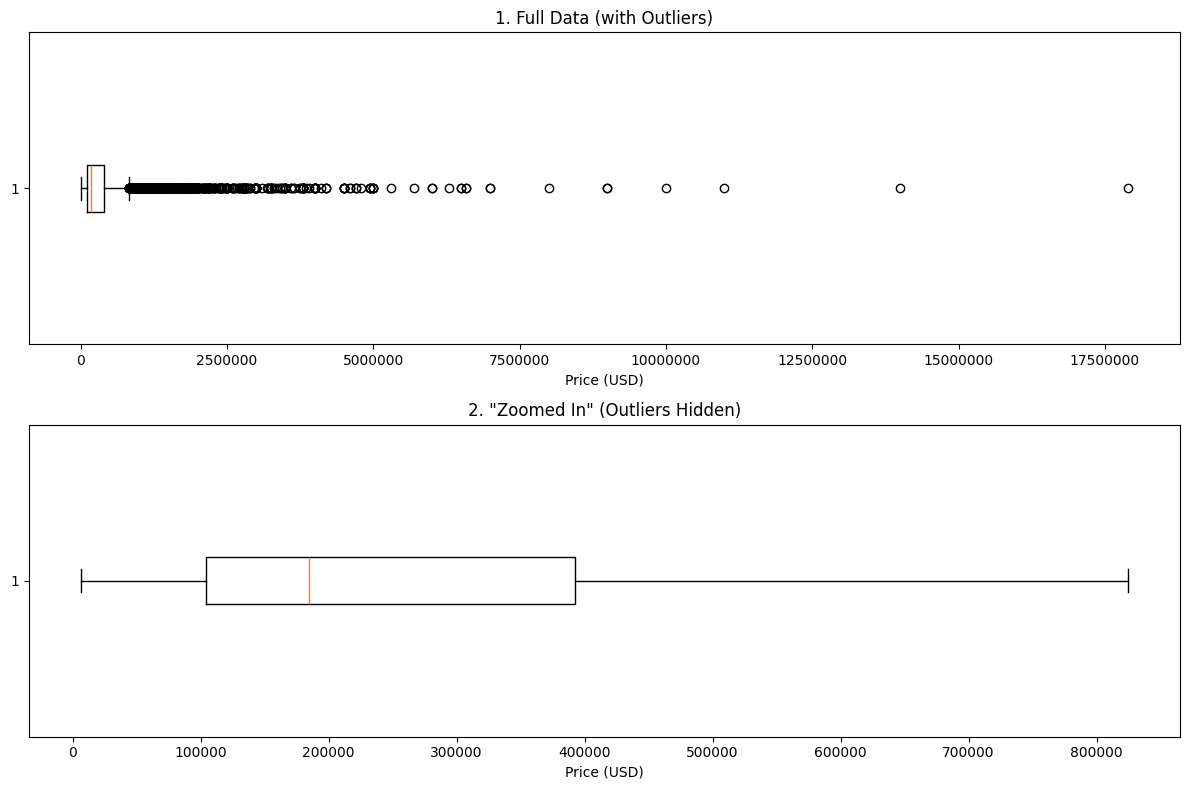

In [ ]:
fig, (ax1, ax2) = plt.subplots(2, 1, figsize=(12, 8))

ax1.boxplot(df['price_aprox_usd'].dropna(), vert=False)

ax1.set_title('1. Full Data (with Outliers)')

ax1.set_xlabel('Price (USD)')

ax2.boxplot(df['price_aprox_usd'].dropna(), vert=False, showfliers=False)

ax2.set_title('2. "Zoomed In" (Outliers Hidden)')

ax2.set_xlabel('Price (USD)')

plt.tight_layout()
plt.show()

#I plotted a histogram of price_aprox_usd with a logarithmic y-axis to observe its distribution, especially for higher price ranges.


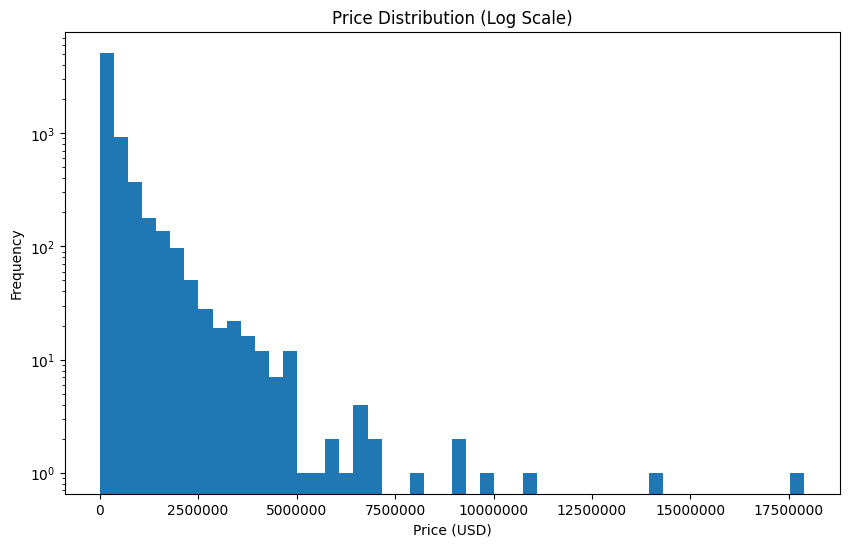

In [ ]:
df['price_aprox_usd'].plot(
    kind='hist',
    bins=50,
    logy=True,
    title='Price Distribution (Log Scale)',
    figsize=(10, 6)
)
plt.xlabel('Price (USD)')
plt.show()

#I generated descriptive statistics for surface_covered_in_m2 to understand the typical size of properties in my dataset.

In [ ]:
df['surface_covered_in_m2'].describe()

,surface_covered_in_m2
count,"7,192.00"
mean,"1,022.77"
std,"41,631.67"
min,0.00
25%,133.00
50%,220.00
75%,350.00
max,"2,900,000.00"


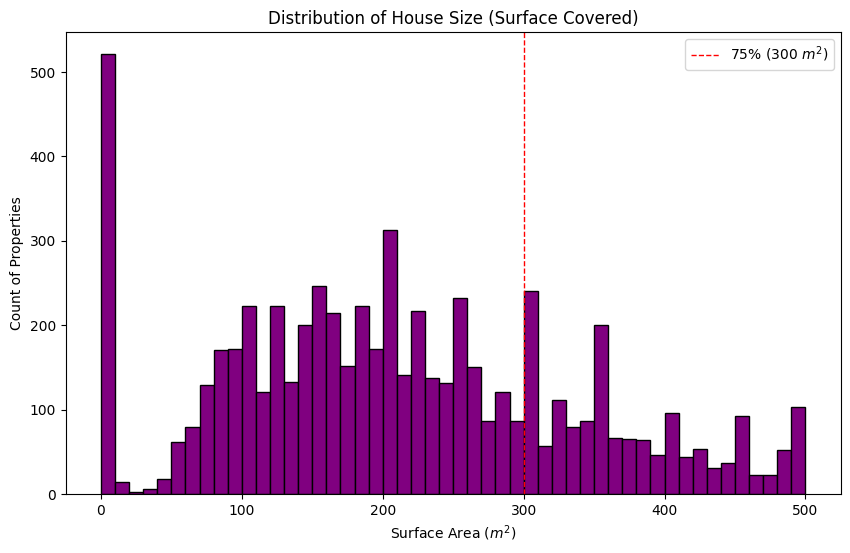

In [ ]:
area_data = df['surface_covered_in_m2'].dropna()

plt.figure(figsize=(10, 6))

plt.hist(area_data, bins=50, range=(0, 500), color='purple', edgecolor='black')
plt.gca().xaxis.set_major_formatter(ticker.FormatStrFormatter('%.0f'))
plt.title('Distribution of House Size (Surface Covered)')
plt.xlabel('Surface Area ($m^2$)')
plt.ylabel('Count of Properties')
plt.axvline(300, color='red', linestyle='dashed', linewidth=1, label='75% (300 $m^2$)')
plt.legend()

plt.show()

#I created a scatter plot to visualize the relationship between surface_covered_in_m2 and price_aprox_usd, assessing how price varies with property size.

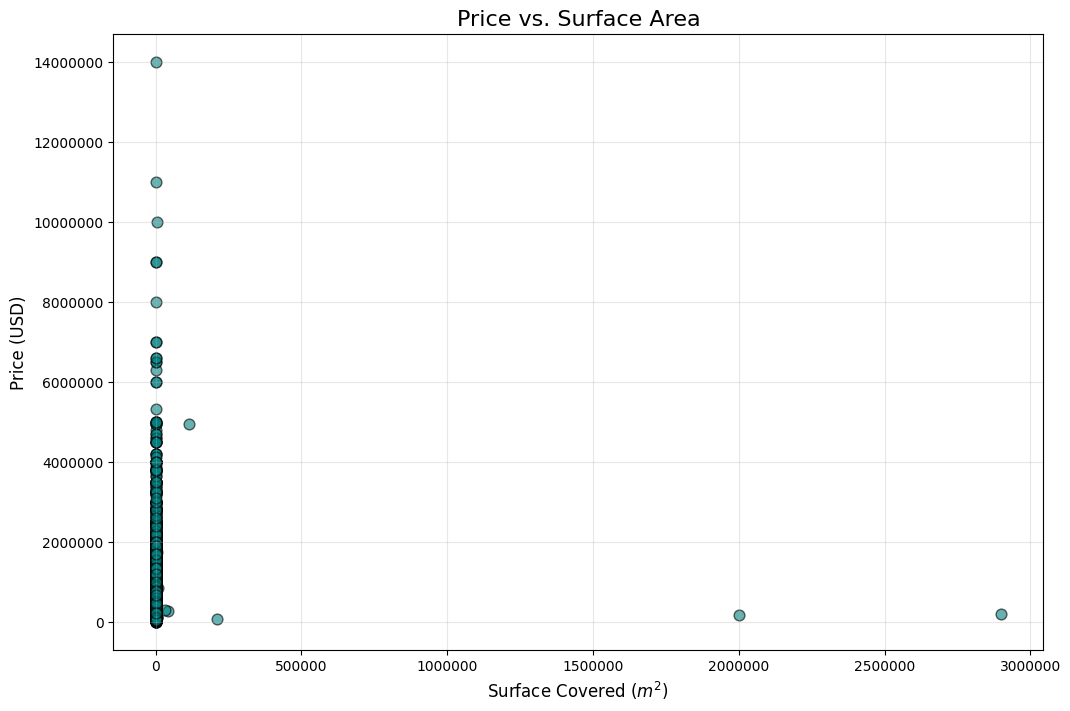

In [ ]:
subset = df.dropna(subset=['price_aprox_usd', 'surface_covered_in_m2'])

plt.figure(figsize=(12, 8))
plt.scatter(
    subset['surface_covered_in_m2'],
    subset['price_aprox_usd'],
    alpha=0.6,
    c='teal',
    edgecolors='black',
    s=60
)

plt.title('Price vs. Surface Area', fontsize=16)
plt.xlabel('Surface Covered ($m^2$)', fontsize=12)
plt.ylabel('Price (USD)', fontsize=12)
plt.grid(True, alpha=0.3)
plt.show()

#I calculated descriptive statistics for price_aprox_usd and surface_covered_in_m2 after filtering out outliers to get a more accurate summary.


In [ ]:
df[['price_aprox_usd', 'surface_covered_in_m2']].describe()

,price_aprox_usd,surface_covered_in_m2
count,"5,329.00","5,329.00"
mean,"298,391.75",289.67
std,"330,199.61",224.32
min,"18,494.00",25.00
25%,"114,593.10",150.00
50%,"184,446.42",230.00
75%,"342,462.14",350.00
max,"4,000,000.00","3,287.00"


#I filtered the DataFrame to include only properties with surface_covered_in_m2 greater than 0, removing invalid area entries.

In [ ]:
df = df[df["surface_covered_in_m2"] > 0]
df.head()

,operation,property_type,price,currency,price_aprox_local_currency,price_aprox_usd,surface_covered_in_m2,price_per_m2,properati_url,lat,lon,state
8,sell,house,"3,750,000.00",MXN,"3,716,076.40","197,574.31",250.00,"15,000.00",http://torres-lindavista.properati.com.mx/pw1o...,19.51,-99.14,Distrito Federal
9,sell,house,"2,578,909.00",MXN,"2,556,185.36","135,905.86",205.00,"12,580.04",http://militar-marte.properati.com.mx/rbx1_ven...,19.38,-99.13,Distrito Federal
10,sell,house,"1,890,000.00",MXN,"1,873,346.53","99,601.06",193.00,"9,792.75",http://coyoacan.properati.com.mx/qtgj_venta_ca...,19.34,-99.13,Distrito Federal
11,sell,house,"26,000,000.00",MXN,"25,770,906.95","1,370,173.43","1,500.00","17,333.33",http://tlalpan.properati.com.mx/pmpt_venta_cas...,19.29,-99.17,Distrito Federal
12,sell,house,"7,250,000.00",MXN,"7,186,118.26","382,067.59",340.00,"21,323.53",http://benito-juarez.properati.com.mx/r15j_ven...,19.38,-99.13,Distrito Federal


#I calculated a new feature, price_usd_per_m2, by dividing price_aprox_usd by surface_covered_in_m2 to standardize price by area.


In [ ]:
df['price_usd_per_m2'] = df['price_aprox_usd'] / df['surface_covered_in_m2']

#I generated descriptive statistics for price_aprox_usd, surface_covered_in_m2, and the newly created price_usd_per_m2.


In [ ]:
df[['price_aprox_usd', 'surface_covered_in_m2', 'price_usd_per_m2']].describe()

,price_aprox_usd,surface_covered_in_m2,price_usd_per_m2
count,"6,663.00","6,684.00","6,663.00"
mean,"398,905.39","1,100.50","2,088.52"
std,"646,391.86","43,183.99","41,995.99"
min,"6,585.81",1.00,0.07
25%,"105,065.61",150.00,565.99
50%,"184,446.42",235.00,827.06
75%,"392,514.30",364.00,"1,390.92"
max,"10,000,000.00","2,900,000.00","3,000,000.00"


#I filtered the DataFrame to keep only properties with price_usd_per_m2 values between the 10th and 90th percentiles, removing extreme outliers.


In [ ]:
low_m2, high_m2 = df["price_usd_per_m2"].quantile([0.1, 0.9])
middle_m2 = df["price_usd_per_m2"].between(low_m2, high_m2)
df = df[middle_m2]

#I generated descriptive statistics for the key numerical columns (price_aprox_usd, surface_covered_in_m2, price_usd_per_m2) after removing outliers.


In [ ]:
df[['price_aprox_usd', 'surface_covered_in_m2', 'price_usd_per_m2']].describe()

,price_aprox_usd,surface_covered_in_m2,price_usd_per_m2
count,"5,329.00","5,329.00","5,329.00"
mean,"298,391.75",289.67,956.06
std,"330,199.61",224.32,431.73
min,"18,494.00",25.00,404.03
25%,"114,593.10",150.00,617.96
50%,"184,446.42",230.00,827.06
75%,"342,462.14",350.00,"1,218.81"
max,"4,000,000.00","3,287.00","2,136.93"


#I created a histogram to visualize the distribution of price_usd_per_m2 after cleaning and outlier removal.

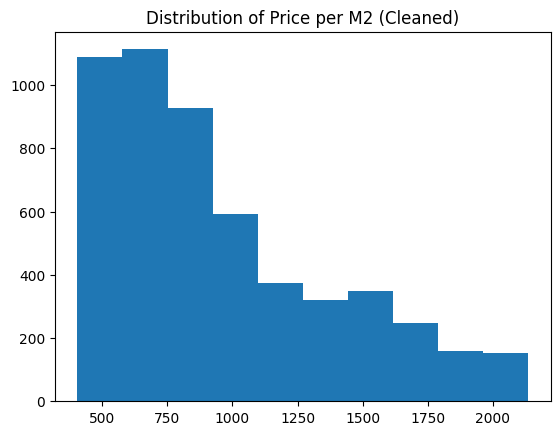

In [ ]:
import matplotlib.pyplot as plt
plt.hist(df["price_usd_per_m2"])
plt.title("Distribution of Price per M2 (Cleaned)")
plt.show()

# I calculated the correlation coefficient between `surface_covered_in_m2` and `price_aprox_usd` to quantify their linear relationship.

In [ ]:
corr = df['surface_covered_in_m2'].corr(df['price_aprox_usd'])
print(f"Correlation score: {corr:.2f}")

Correlation score: 0.86


# I grouped the data by `state` to calculate the median `price_aprox_usd` and visualized the top 7 most expensive states using a horizontal bar chart.

--- Most Expensive States (Median Price) ---
state
Quintana Roo       189,716.32
Distrito Federal   186,409.35
Jerez              160,693.77
Othón P. Blanco    158,059.45
Solidaridad         92,473.64
Name: price_aprox_usd, dtype: float64


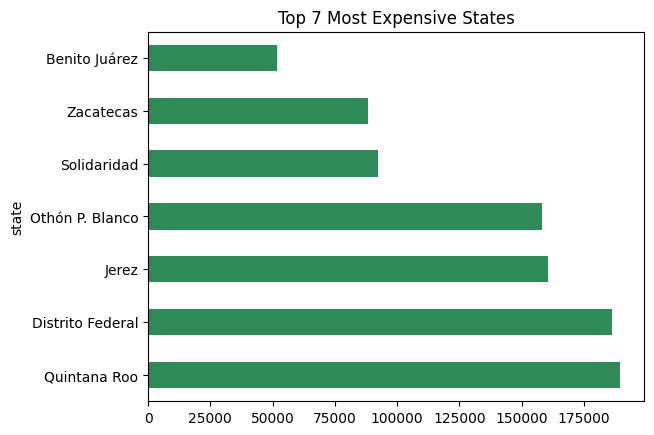

In [ ]:
state_prices = df.groupby('state')['price_aprox_usd'].median().sort_values(ascending=False)

print("--- Most Expensive States (Median Price) ---")
print(state_prices.head(5))
state_prices.head(7).plot(kind='barh', color='seagreen')
plt.title('Top 7 Most Expensive States')
plt.show()

#I created a scatter plot of price_aprox_usd vs. surface_covered_in_m2, with points colored by state, to visualize regional price-area relationships.


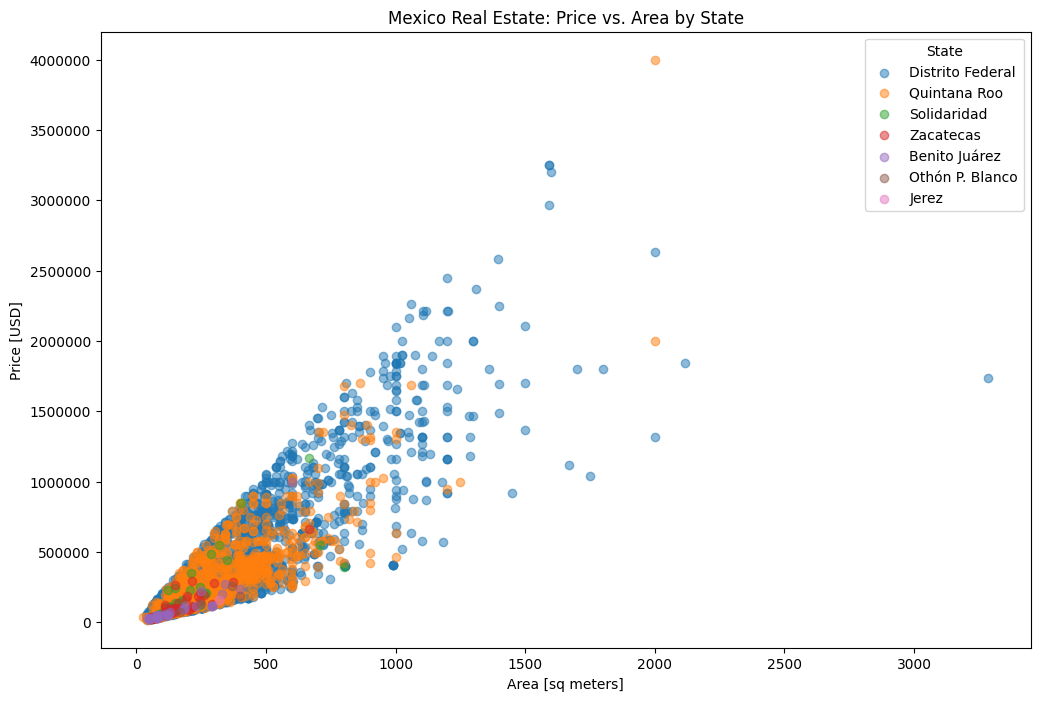

In [ ]:
fig, ax = plt.subplots(figsize=(12, 8))

for state in df['state'].unique():
    subset = df[df['state'] == state]
    ax.scatter(subset["surface_covered_in_m2"], subset["price_aprox_usd"],
               label=state,
               alpha=0.5)

ax.set_xlabel("Area [sq meters]")
ax.set_ylabel("Price [USD]")
ax.set_title("Mexico Real Estate: Price vs. Area by State")
ax.legend(title="State")
plt.show()

#I generated an interactive scattermapbox plot showing properties based on their latitude and longitude, colored by price_aprox_usd, with state information on hover.


In [ ]:
fig = px.scatter_mapbox(
    df,
    lat="lat",
    lon="lon",
    width=800,
    height=600,
    color="price_aprox_usd",
    hover_data=["price_aprox_usd", "state"],
    zoom=4,
    center={"lat": 23.6345, "lon": -102.5528}
)


fig.update_layout(mapbox_style="open-street-map")

fig.show()

#I displayed the DataFrame's information to get an overview of data types and non-null counts after the previous data cleaning and feature engineering steps.


In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 5329 entries, 8 to 23137
Data columns (total 13 columns):
 #   Column                      Non-Null Count  Dtype  
---  ------                      --------------  -----  
 0   operation                   5329 non-null   object 
 1   property_type               5329 non-null   object 
 2   price                       5329 non-null   float64
 3   currency                    5329 non-null   object 
 4   price_aprox_local_currency  5329 non-null   float64
 5   price_aprox_usd             5329 non-null   float64
 6   surface_covered_in_m2       5329 non-null   float64
 7   price_per_m2                5329 non-null   float64
 8   properati_url               5329 non-null   object 
 9   lat                         4841 non-null   float64
 10  lon                         4841 non-null   float64
 11  state                       5329 non-null   object 
 12  price_usd_per_m2            5329 non-null   float64
dtypes: float64(8), object(5)
memory usage

#I dropped several columns (operation, property_type, price, currency, price_aprox_local_currency, price_per_m2, price_usd_per_m2, properati_url) that are no longer needed for my model, and displayed the head of the cleaned DataFrame.


In [ ]:
df.drop(columns=["operation",	"property_type",	"price",	"currency",	"price_aprox_local_currency", "price_per_m2",	"price_usd_per_m2", "properati_url"], inplace=True)
df.head()

,price_aprox_usd,surface_covered_in_m2,lat,lon,state
8,"197,574.31",250.00,19.51,-99.14,Distrito Federal
9,"135,905.86",205.00,19.38,-99.13,Distrito Federal
10,"99,601.06",193.00,19.34,-99.13,Distrito Federal
11,"1,370,173.43","1,500.00",19.29,-99.17,Distrito Federal
12,"382,067.59",340.00,19.38,-99.13,Distrito Federal


#I generated a correlation matrix for all numerical columns and visualized it as a heatmap to understand the relationships between features.


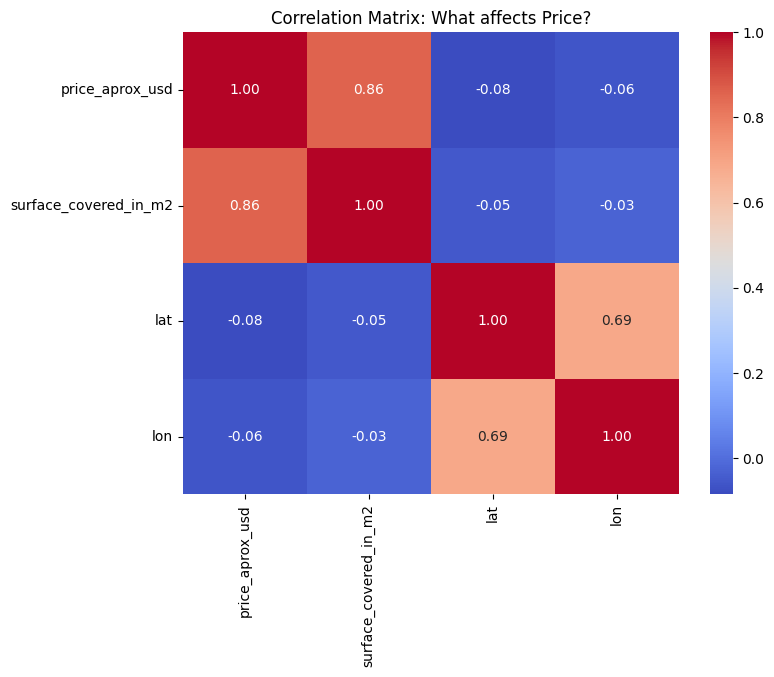

In [ ]:
import matplotlib.pyplot as plt
corr = df.select_dtypes('number').corr()
plt.figure(figsize=(8, 6))
sns.heatmap(corr, annot=True, cmap='coolwarm', fmt=".2f")
plt.title("Correlation Matrix: What affects Price?")

plt.show()

#I created a pair plot for price_aprox_usd, surface_covered_in_m2, lat, and lon to visualize their individual distributions and pairwise relationships.


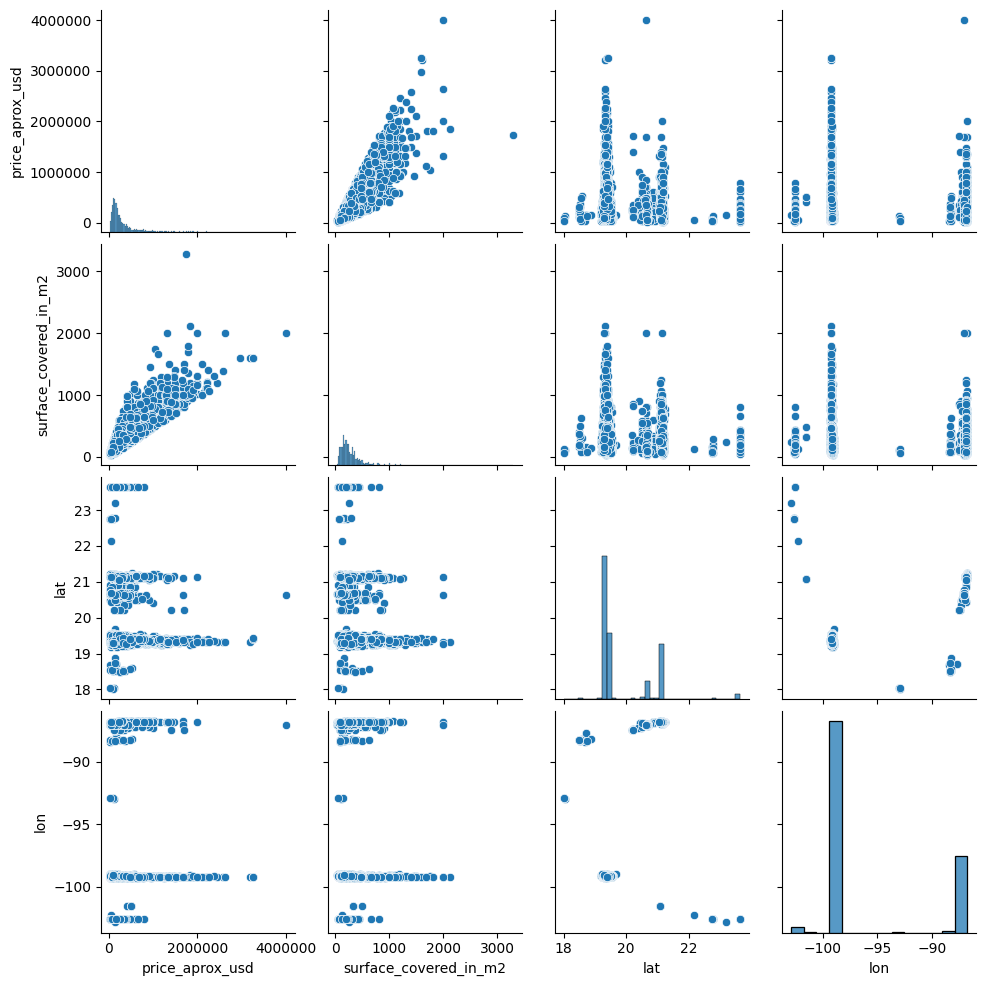

In [ ]:
cols_to_plot = ['price_aprox_usd', 'surface_covered_in_m2', 'lat', 'lon']
sns.pairplot(df[cols_to_plot], height=2.5)
plt.show()

#I applied One-Hot Encoding to the state column, converting categorical state names into numerical features for model input.


In [ ]:
encoder = OneHotEncoder()

state_encoded = encoder.fit_transform(df[['state']]).toarray()
state_df = pd.DataFrame(state_encoded, columns=encoder.get_feature_names_out(['state']))
df = df.reset_index(drop=True)

df = pd.concat([df, state_df], axis=1)
df.drop(columns='state', inplace=True)
df.head()

,price_aprox_usd,surface_covered_in_m2,lat,lon,state_Benito Juárez,state_Distrito Federal,state_Jerez,state_Othón P. Blanco,state_Quintana Roo,state_Solidaridad,state_Zacatecas
0,"197,574.31",250.00,19.51,-99.14,0.00,1.00,0.00,0.00,0.00,0.00,0.00
1,"135,905.86",205.00,19.38,-99.13,0.00,1.00,0.00,0.00,0.00,0.00,0.00
2,"99,601.06",193.00,19.34,-99.13,0.00,1.00,0.00,0.00,0.00,0.00,0.00
3,"1,370,173.43","1,500.00",19.29,-99.17,0.00,1.00,0.00,0.00,0.00,0.00,0.00
4,"382,067.59",340.00,19.38,-99.13,0.00,1.00,0.00,0.00,0.00,0.00,0.00


#I displayed the DataFrame's information to confirm the successful One-Hot Encoding and check the updated number of columns and data types.


In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5329 entries, 0 to 5328
Data columns (total 11 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   price_aprox_usd         5329 non-null   float64
 1   surface_covered_in_m2   5329 non-null   float64
 2   lat                     4841 non-null   float64
 3   lon                     4841 non-null   float64
 4   state_Benito Juárez     5329 non-null   float64
 5   state_Distrito Federal  5329 non-null   float64
 6   state_Jerez             5329 non-null   float64
 7   state_Othón P. Blanco   5329 non-null   float64
 8   state_Quintana Roo      5329 non-null   float64
 9   state_Solidaridad       5329 non-null   float64
 10  state_Zacatecas         5329 non-null   float64
dtypes: float64(11)
memory usage: 458.1 KB


#I identified columns with null values after encoding to ensure all features are complete before model training.


In [ ]:
null_cols = df.columns[df.isnull().any()]
null_cols

Index(['lat', 'lon'], dtype='object')

#I imputed missing values in the lat and lon columns with their respective medians to handle any remaining NaN values.

In [ ]:
for col in null_cols:
    median = df[col].median()
    df[col].fillna(median, inplace=True)

# I displayed the DataFrame's information and head after imputation to confirm that all null values have been addressed.


In [ ]:
df.info()
df.head()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5329 entries, 0 to 5328
Data columns (total 11 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   price_aprox_usd         5329 non-null   float64
 1   surface_covered_in_m2   5329 non-null   float64
 2   lat                     5329 non-null   float64
 3   lon                     5329 non-null   float64
 4   state_Benito Juárez     5329 non-null   float64
 5   state_Distrito Federal  5329 non-null   float64
 6   state_Jerez             5329 non-null   float64
 7   state_Othón P. Blanco   5329 non-null   float64
 8   state_Quintana Roo      5329 non-null   float64
 9   state_Solidaridad       5329 non-null   float64
 10  state_Zacatecas         5329 non-null   float64
dtypes: float64(11)
memory usage: 458.1 KB


,price_aprox_usd,surface_covered_in_m2,lat,lon,state_Benito Juárez,state_Distrito Federal,state_Jerez,state_Othón P. Blanco,state_Quintana Roo,state_Solidaridad,state_Zacatecas
0,"197,574.31",250.00,19.51,-99.14,0.00,1.00,0.00,0.00,0.00,0.00,0.00
1,"135,905.86",205.00,19.38,-99.13,0.00,1.00,0.00,0.00,0.00,0.00,0.00
2,"99,601.06",193.00,19.34,-99.13,0.00,1.00,0.00,0.00,0.00,0.00,0.00
3,"1,370,173.43","1,500.00",19.29,-99.17,0.00,1.00,0.00,0.00,0.00,0.00,0.00
4,"382,067.59",340.00,19.38,-99.13,0.00,1.00,0.00,0.00,0.00,0.00,0.00


# I separated the target variable price_aprox_usd (y) from the feature matrix (X), which includes all other columns.


In [ ]:
y = df['price_aprox_usd']
X = df.drop(columns='price_aprox_usd')
print("Shape of y:", y.shape)
print("Shape of X:", X.shape)

Shape of y: (5329,)
Shape of X: (5329, 10)


# I split the data into training and testing sets, allocating 80% for training and 20% for testing, ensuring reproducibility with random_state=True.


In [ ]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=True)

print("X_train shape:", X_train.shape)
print("X_test shape:", X_test.shape)
print("y_train shape:", y_train.shape)
print("y_test shape:", y_test.shape)

X_train shape: (4263, 10)
X_test shape: (1066, 10)
y_train shape: (4263,)
y_test shape: (1066,)


# I applied StandardScaler to normalize the numerical features in both the training and testing sets, which helps improve model performance.


In [ ]:
scaler = StandardScaler()

X_train_scaled = pd.DataFrame(scaler.fit_transform(X_train), columns=X_train.columns)
X_test_scaled = pd.DataFrame(scaler.transform(X_test), columns=X_test.columns)

print("X_train_scaled shape:", X_train_scaled.shape)
print("X_test_scaled shape:", X_test_scaled.shape)
X_train_scaled.head()

X_train_scaled shape: (4263, 10)
X_test_scaled shape: (1066, 10)


,surface_covered_in_m2,lat,lon,state_Benito Juárez,state_Distrito Federal,state_Jerez,state_Othón P. Blanco,state_Quintana Roo,state_Solidaridad,state_Zacatecas
0,-0.62,-0.65,-0.55,-0.08,0.62,-0.02,-0.03,-0.58,-0.09,-0.09
1,2.65,-0.49,-0.56,-0.08,0.62,-0.02,-0.03,-0.58,-0.09,-0.09
2,-0.53,-0.61,-0.56,-0.08,0.62,-0.02,-0.03,-0.58,-0.09,-0.09
3,-0.40,-1.51,1.51,-0.08,-1.62,-0.02,-0.03,1.73,-0.09,-0.09
4,-0.79,-0.63,-0.56,-0.08,0.62,-0.02,-0.03,-0.58,-0.09,-0.09


# I generated polynomial features of degree 2 from the scaled data to capture potential non-linear relationships, expanding the feature space for my models.


In [ ]:
poly = PolynomialFeatures(degree=2, include_bias=False)

X_train_poly = poly.fit_transform(X_train_scaled)
X_test_poly = poly.transform(X_test_scaled)

print("X_train_poly shape:", X_train_poly.shape)
print("X_test_poly shape:", X_test_poly.shape)

X_train_poly shape: (4263, 65)
X_test_poly shape: (1066, 65)


# I defined hyperparameter grids for Lasso Regression, K-Nearest Neighbors, Random Forest, and XGBoost to be used in Randomized Search Cross-Validation.


In [ ]:

param_random_lasso = {
    'alpha': [0.001, 0.01, 0.1, 1, 10],
    'max_iter': [1000, 2000, 3000, 5000]
}

param_random_knn = {
    'n_neighbors': [3, 5, 7, 9, 11],
    'weights': ['uniform', 'distance'],
    'metric': ['euclidean', 'manhattan'],
}

param_random_rf = {
    'n_estimators': [200, 300, 400, 500],
    'max_depth': [5, 8, 10, 12, 15],
    'min_samples_split': [10, 20, 30, 40],
    'min_samples_leaf': [5, 10, 15, 20],
    'max_features': ['sqrt', 0.3, 0.5],
    'bootstrap': [True]
}


param_random_xgb = {
    'n_estimators': [100, 300, 500],
    'learning_rate': [0.01, 0.05, 0.1],
    'max_depth': [3, 5, 7],
    'subsample': [0.7, 0.8, 0.9],
    'colsample_bytree': [0.7, 0.8, 0.9],
    'reg_alpha': [0, 0.1, 1, 10],
    'reg_lambda': [1, 10, 50],
    'gamma': [0, 1, 5]
}

print("Lasso Regression Hyperparameter Grid:", param_random_lasso)
print("K-Nearest Neighbors Regressor Hyperparameter Grid:", param_random_knn)
print("Random Forest Regressor Hyperparameter Grid:", param_random_rf)
print("XGBoost Regressor Hyperparameter Grid:", param_random_xgb)

Lasso Regression Hyperparameter Grid: {'alpha': [0.001, 0.01, 0.1, 1, 10], 'max_iter': [1000, 2000, 3000, 5000]}
K-Nearest Neighbors Regressor Hyperparameter Grid: {'n_neighbors': [3, 5, 7, 9, 11], 'weights': ['uniform', 'distance'], 'metric': ['euclidean', 'manhattan']}
Random Forest Regressor Hyperparameter Grid: {'n_estimators': [200, 300, 400, 500], 'max_depth': [5, 8, 10, 12, 15], 'min_samples_split': [10, 20, 30, 40], 'min_samples_leaf': [5, 10, 15, 20], 'max_features': ['sqrt', 0.3, 0.5], 'bootstrap': [True]}
XGBoost Regressor Hyperparameter Grid: {'n_estimators': [100, 300, 500], 'learning_rate': [0.01, 0.05, 0.1], 'max_depth': [3, 5, 7], 'subsample': [0.7, 0.8, 0.9], 'colsample_bytree': [0.7, 0.8, 0.9], 'reg_alpha': [0, 0.1, 1, 10], 'reg_lambda': [1, 10, 50], 'gamma': [0, 1, 5]}


# I trained a LinearRegression model, evaluated its performance on both training and test sets using MAE, MSE, and R-squared, and stored the results.


In [ ]:
# Initialize a list to store results for all models
all_model_results = []

linear_model = LinearRegression()


linear_model.fit(X_train_scaled, y_train)


y_pred_train_linear = linear_model.predict(X_train_scaled)
y_pred_test_linear = linear_model.predict(X_test_scaled)

mae_train_linear = mean_absolute_error(y_train, y_pred_train_linear)
mae_test_linear = mean_absolute_error(y_test, y_pred_test_linear)
mse_test_linear = mean_squared_error(y_test, y_pred_test_linear)
r2_test_linear = r2_score(y_test, y_pred_test_linear)


linear_results = {
    'Model': 'Linear Regression',
    'Training MAE': mae_train_linear,
    'Test MAE': mae_test_linear,
    'Test MSE': mse_test_linear,
    'Test R-squared': r2_test_linear,
    'Coefficients': linear_model.coef_,
    'Intercept': linear_model.intercept_
}


all_model_results.append(linear_results)

print(linear_results)


{'Model': 'Linear Regression', 'Training MAE': 107035.59571448235, 'Test MAE': 112125.51276951046, 'Test MSE': 27686543882.467945, 'Test R-squared': 0.7619441993059932, 'Coefficients': array([ 2.80039605e+05, -1.18783866e+04, -7.46345437e+03, -1.60605451e+02,
       -2.34554393e+03, -2.80266638e+03, -4.68048420e+03,  1.49759906e+03,
        5.29410875e+03,  1.18324242e+03]), 'Intercept': np.float64(295979.23075768235)}


# I trained a LinearRegression model with polynomial features, evaluated its performance on both training and test sets, and stored the results.


In [ ]:
poly_model = LinearRegression()

poly_model.fit(X_train_poly, y_train)

y_pred_train_poly = poly_model.predict(X_train_poly)
y_pred_test_poly = poly_model.predict(X_test_poly)

mae_train_poly = mean_absolute_error(y_train, y_pred_train_poly)
mae_test_poly = mean_absolute_error(y_test, y_pred_test_poly)
mse_test_poly = mean_squared_error(y_test, y_pred_test_poly)
r2_test_poly = r2_score(y_test, y_pred_test_poly)

poly_results = {
    'Model': 'Polynomial Regression',
    'Training MAE': mae_train_poly,
    'Test MAE': mae_test_poly,
    'Test MSE': mse_test_poly,
    'Test R-squared': r2_test_poly,
    'Coefficients': poly_model.coef_,
    'Intercept': poly_model.intercept_
}

all_model_results.append(poly_results)

print(poly_results)

{'Model': 'Polynomial Regression', 'Training MAE': 105727.30396047003, 'Test MAE': 112026.61986106627, 'Test MSE': 27998813793.645565, 'Test R-squared': 0.7592592248269248, 'Coefficients': array([ 2.87279335e+05, -6.38858117e+04, -7.96103037e+05,  3.89831367e+02,
       -5.72962097e+04,  2.34738373e+00, -2.80058298e+03,  5.89289826e+04,
        5.78508619e+02,  7.43921379e+02, -4.88415037e+03, -5.12472475e+04,
        4.30815520e+04, -5.04097845e+03,  5.56979681e+03, -4.40016113e+03,
       -2.71035790e+04, -6.81878622e+03, -2.79920302e+02,  1.97901699e+04,
       -3.29211357e+04, -3.16971056e+04, -2.82658317e+04, -1.79699162e+04,
        9.77397999e+02, -2.38886609e+05,  2.16265162e+04,  6.87219462e+04,
        2.12520944e+04, -1.11871071e+04,  6.37340320e+04, -3.51795731e+05,
        1.21931837e+04,  1.75916997e+06,  2.04796304e+05,  1.17046696e+03,
        9.90427186e+04,  4.59781411e+03,  4.19338220e+03, -6.16893135e+00,
        2.23821205e+02, -5.18690588e+03, -8.51784252e+01, -9.

# I performed RandomizedSearchCV to find the best hyperparameters for a Lasso regression model and then evaluated its performance.


In [ ]:
lasso = Lasso(random_state=42)

random_search_lasso = RandomizedSearchCV(lasso, param_random_lasso, cv=5, scoring='neg_mean_absolute_error', n_jobs=-1)
random_search_lasso.fit(X_train_scaled, y_train)


best_lasso_model = random_search_lasso.best_estimator_

y_pred_train_lasso = best_lasso_model.predict(X_train_scaled)
y_pred_test_lasso = best_lasso_model.predict(X_test_scaled)


mae_train_lasso = mean_absolute_error(y_train, y_pred_train_lasso)
mae_test_lasso = mean_absolute_error(y_test, y_pred_test_lasso)
mse_test_lasso = mean_squared_error(y_test, y_pred_test_lasso)
r2_test_lasso = r2_score(y_test, y_pred_test_lasso)

lasso_results = {
    'Model': 'Lasso Regression',
    'Training MAE': mae_train_lasso,
    'Test MAE': mae_test_lasso,
    'Test MSE': mse_test_lasso,
    'Test R-squared': r2_test_lasso,
    'Best Hyperparameters': random_search_lasso.best_params_,
    'Coefficients': best_lasso_model.coef_,
    'Intercept': best_lasso_model.intercept_
}


all_model_results.append(lasso_results)

print(lasso_results)

{'Model': 'Lasso Regression', 'Training MAE': 107033.95961557464, 'Test MAE': 112123.1301260559, 'Test MSE': 27686368985.295414, 'Test R-squared': 0.7619457031154474, 'Best Hyperparameters': {'max_iter': 1000, 'alpha': 10}, 'Coefficients': array([280029.04919194, -11859.19943957,  -7460.38677007,   -443.02671669,
        -3873.60657655,  -2845.04078928,  -4774.81784086,     -0.        ,
         4963.8237153 ,    853.16328171]), 'Intercept': np.float64(295979.23075768235)}


# I used RandomizedSearchCV to optimize the KNeighborsRegressor model's hyperparameters and then evaluated its performance.


In [ ]:
knn = KNeighborsRegressor()


random_search_knn = RandomizedSearchCV(knn, param_random_knn, cv=5, scoring='neg_mean_absolute_error', n_jobs=-1)
random_search_knn.fit(X_train_scaled, y_train)


best_knn_model = random_search_knn.best_estimator_


y_pred_train_knn = best_knn_model.predict(X_train_scaled)
y_pred_test_knn = best_knn_model.predict(X_test_scaled)


mae_train_knn = mean_absolute_error(y_train, y_pred_train_knn)
mae_test_knn = mean_absolute_error(y_test, y_pred_test_knn)
mse_test_knn = mean_squared_error(y_test, y_pred_test_knn)
r2_test_knn = r2_score(y_test, y_pred_test_knn)


knn_results = {
    'Model': 'K-Nearest Neighbors Regressor',
    'Training MAE': mae_train_knn,
    'Test MAE': mae_test_knn,
    'Test MSE': mse_test_knn,
    'Test R-squared': r2_test_knn,
    'Best Hyperparameters': random_search_knn.best_params_
}


all_model_results.append(knn_results)

print(knn_results)

{'Model': 'K-Nearest Neighbors Regressor', 'Training MAE': 6451.733343677043, 'Test MAE': 86328.1739555734, 'Test MSE': 25294061882.58622, 'Test R-squared': 0.7825153554801121, 'Best Hyperparameters': {'weights': 'distance', 'n_neighbors': 9, 'metric': 'manhattan'}}


# I conducted RandomizedSearchCV to find the optimal hyperparameters for a RandomForestRegressor and then assessed its performance.


In [ ]:
rf = RandomForestRegressor(random_state=42)


random_search_rf = RandomizedSearchCV(
    rf,
    param_random_rf,
    n_iter=50,
    cv=5,
    scoring='neg_mean_absolute_error',
    n_jobs=-1,
    random_state=42,
    verbose=1
)





random_search_rf.fit(X_train_scaled, y_train)


best_rf_model = random_search_rf.best_estimator_


y_pred_train_rf = best_rf_model.predict(X_train_scaled)
y_pred_test_rf = best_rf_model.predict(X_test_scaled)


mae_train_rf = mean_absolute_error(y_train, y_pred_train_rf)
mae_test_rf = mean_absolute_error(y_test, y_pred_test_rf)
mse_test_rf = mean_squared_error(y_test, y_pred_test_rf)
r2_test_rf = r2_score(y_test, y_pred_test_rf)

rf_results = {
    'Model': 'Random Forest Regressor',
    'Training MAE': mae_train_rf,
    'Test MAE': mae_test_rf,
    'Test MSE': mse_test_rf,
    'Test R-squared': r2_test_rf,
    'Best Hyperparameters': random_search_rf.best_params_
}


all_model_results.append(rf_results)

print(rf_results)

Fitting 5 folds for each of 50 candidates, totalling 250 fits
{'Model': 'Random Forest Regressor', 'Training MAE': 70328.81606552623, 'Test MAE': 83967.0224821518, 'Test MSE': 19448634465.876938, 'Test R-squared': 0.8327757964362184, 'Best Hyperparameters': {'n_estimators': 200, 'min_samples_split': 20, 'min_samples_leaf': 5, 'max_features': 0.5, 'max_depth': 12, 'bootstrap': True}}


# I executed RandomizedSearchCV to tune the XGBRegressor model's hyperparameters and subsequently evaluated its predictive performance.


In [ ]:
xgb = XGBRegressor(random_state=42, objective='reg:squarederror')

random_search_xgb = RandomizedSearchCV(
    xgb,
    param_random_xgb,
    n_iter=50,
    cv=5,
    scoring='neg_mean_absolute_error',
    n_jobs=-1,
    random_state=42,
    verbose=1
)


random_search_xgb.fit(X_train_scaled, y_train)


best_xgb_model = random_search_xgb.best_estimator_


y_pred_train_xgb = best_xgb_model.predict(X_train_scaled)
y_pred_test_xgb = best_xgb_model.predict(X_test_scaled)


mae_train_xgb = mean_absolute_error(y_train, y_pred_train_xgb)
mae_test_xgb = mean_absolute_error(y_test, y_pred_test_xgb)
mse_test_xgb = mean_squared_error(y_test, y_pred_test_xgb)
r2_test_xgb = r2_score(y_test, y_pred_test_xgb)


xgb_results = {
    'Model': 'XGBoost Regressor',
    'Training MAE': mae_train_xgb,
    'Test MAE': mae_test_xgb,
    'Test MSE': mse_test_xgb,
    'Test R-squared': r2_test_xgb,
    'Best Hyperparameters': random_search_xgb.best_params_
}


all_model_results.append(xgb_results)

print(xgb_results)

Fitting 5 folds for each of 50 candidates, totalling 250 fits
{'Model': 'XGBoost Regressor', 'Training MAE': 45439.58378043998, 'Test MAE': 86136.0231700721, 'Test MSE': 26939962131.2383, 'Test R-squared': 0.7683634951678018, 'Best Hyperparameters': {'subsample': 0.7, 'reg_lambda': 10, 'reg_alpha': 10, 'n_estimators': 300, 'max_depth': 7, 'learning_rate': 0.1, 'gamma': 1, 'colsample_bytree': 0.9}}


# I compiled all model results into a DataFrame and sorted them by 'Test R-squared' to easily identify the best-performing model.


In [ ]:
results_df = pd.DataFrame(all_model_results)
results_df = results_df.sort_values(by='Test R-squared', ascending=False)
print(results_df)

                           Model  Training MAE   Test MAE          Test MSE  \
4        Random Forest Regressor     70,328.82  83,967.02 19,448,634,465.88   
3  K-Nearest Neighbors Regressor      6,451.73  86,328.17 25,294,061,882.59   
5              XGBoost Regressor     45,439.58  86,136.02 26,939,962,131.24   
2               Lasso Regression    107,033.96 112,123.13 27,686,368,985.30   
0              Linear Regression    107,035.60 112,125.51 27,686,543,882.47   
1          Polynomial Regression    105,727.30 112,026.62 27,998,813,793.65   

   Test R-squared                                       Coefficients  \
4            0.83                                                NaN   
3            0.78                                                NaN   
5            0.77                                                NaN   
2            0.76  [280029.0491919392, -11859.199439567761, -7460...   
0            0.76  [280039.6049477743, -11878.386636453983, -7463...   
1            0

# I generated a scatter plot comparing the actual price_aprox_usd values against the RandomForestRegressor model's predicted values, including a diagonal line for perfect prediction.

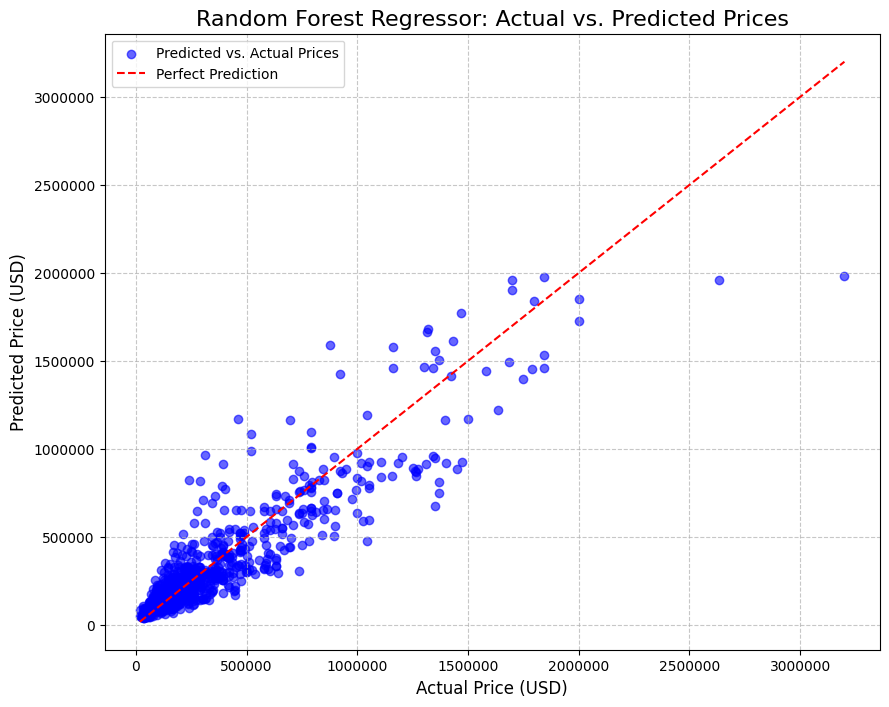

In [ ]:
y_actual_best = y_test
y_pred_rf_best = best_rf_model.predict(X_test_scaled)

plt.figure(figsize=(10, 8))
plt.scatter(y_actual_best, y_pred_rf_best, alpha=0.6, color='blue', label='Predicted vs. Actual Prices')

min_val = min(y_actual_best.min(), y_pred_rf_best.min())
max_val = max(y_actual_best.max(), y_pred_rf_best.max())
plt.plot([min_val, max_val], [min_val, max_val], color='red', linestyle='--', label='Perfect Prediction')

plt.title('Random Forest Regressor: Actual vs. Predicted Prices', fontsize=16)
plt.xlabel('Actual Price (USD)', fontsize=12)
plt.ylabel('Predicted Price (USD)', fontsize=12)
plt.grid(True, linestyle='--', alpha=0.7)
plt.legend()
plt.show()



# In this analysis, I performed a comprehensive exploration and modeling of a real estate dataset. I started by loading and cleaning the data, handling missing values, and transforming features like lat-lon and place_with_parent_names into more usable formats. I focused specifically on 'house' properties and engineered a price_usd_per_m2 feature for better comparative analysis, addressing outliers to refine the dataset's quality.

# Key insights from my exploratory data analysis (EDA) revealed significant distributions in price_aprox_usd and surface_covered_in_m2, with a strong positive correlation between them. Visualizations further highlighted regional price variations and the relationship between price and area across different states.

# For modeling, I preprocessed the data by applying One-Hot Encoding to categorical features, imputing remaining null values, and scaling numerical features. I then generated polynomial features to potentially capture non-linear relationships. I evaluated several regression models: Linear Regression (both standard and with polynomial features), Lasso Regression, K-Nearest Neighbors, Random Forest Regressor, and XGBoost Regressor.

#The RandomForestRegressor emerged as the best-performing model, achieving the highest Test R-squared score of 0.83. This indicates that the Random Forest model was most effective in explaining the variance in property prices and provided the most accurate predictions on unseen data. The scatter plot comparing actual versus predicted prices for the Random Forest model visually confirmed its strong predictive capability, with points clustering closely around the ideal prediction line.

#This robust performance suggests that a Random Forest model, with its ensemble learning approach, is well-suited for predicting real estate prices in this dataset, effectively handling complex relationships between various property features.